In [1]:
using Agents

In [2]:
size = (10, 10)
space = GridSpaceSingle(size; periodic = false, metric = :chebyshev)

GridSpaceSingle with size (10, 10), metric=chebyshev, periodic=false

In [3]:
struct Location
    name::String
    lat::Float32
    lon::Float32
end

In [4]:
loc1 = Location("Los Angeles", 34.0522,-118.2437)

Location("Los Angeles", 34.0522f0, -118.2437f0)

In [5]:
loc1.name   # "Los Angeles"
loc1.lat    # 34.0522
loc1.lon    # -118.2437

-118.2437f0

In [6]:
B = ones(5,5)

5×5 Matrix{Float64}:
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0

In [7]:
A = similar(A)

UndefVarError: UndefVarError: `A` not defined

In [5]:
sites = Location[]

Location[]

In [6]:
push!(sites, Location("Los Angeles", 34.0522,-118.2437))
push!(sites, Location("Las Vegas", 36.1699,-115.1398))

2-element Vector{Location}:
 Location("Los Angeles", 34.0522f0, -118.2437f0)
 Location("Las Vegas", 36.1699f0, -115.1398f0)

In [7]:
@agent struct SchellingAgent(GridAgent{2})
    mood::Bool # whether the agent is happy in its position
    group::Int # The group of the agent, determines mood as it interacts with neighbors
end

In [9]:
for (name, type) in zip(fieldnames(SchellingAgent), fieldtypes(SchellingAgent))
    println(name, "::", type)
end

id::Int64
pos::Tuple{Int64, Int64}
mood::Bool
group::Int64


In [10]:
example_agent = SchellingAgent(id = 1, pos = (2, 3), mood = true, group = 1)

SchellingAgent(1, (2, 3), true, 1)

In [11]:
using Graphs, GraphRecipes, Plots

In [12]:
g1 = Graph(3, 2)

{3, 2} undirected simple Int64 graph

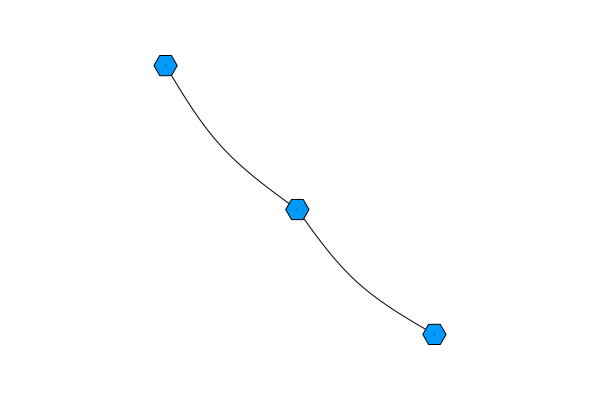

In [13]:
graphplot(g1)

In [14]:
edgelabels = Dict(
    (1, 2) => 1,
    (1, 3) => 2
)

Dict{Tuple{Int64, Int64}, Int64} with 2 entries:
  (1, 2) => 1
  (1, 3) => 2

In [15]:
function viewgraph(g)
    graphplot(g,
        # nodes
        names = 1:nv(g),
        fontsize = 10,
        nodeshape = :circle,
        markersize = 0.15,
        markerstrokewidth = 2,
        # edges
        edgelabel = edgelabels,
        linewidth = 2,
        curves = false
    )
end

viewgraph (generic function with 1 method)

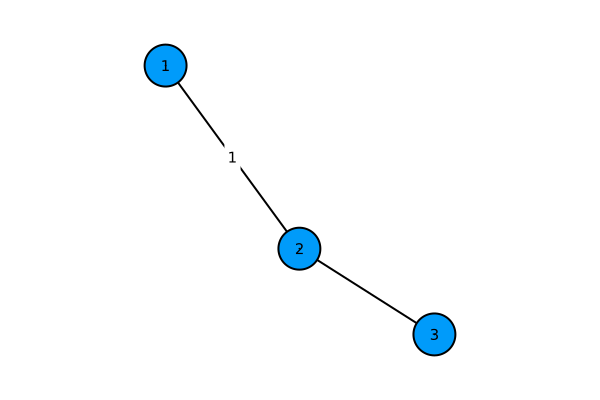

In [16]:
p1 = viewgraph(g1)

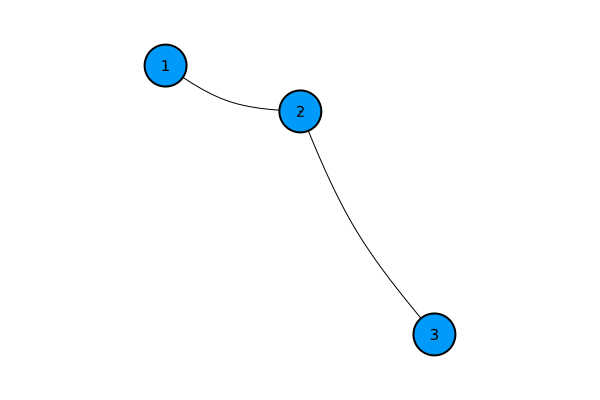

In [18]:
graphplot(g1,
# nodes
names = 1:nv(g1),
fontsize = 10,
nodeshape = :circle,
markersize = 0.15,
markerstrokewidth = 2
)

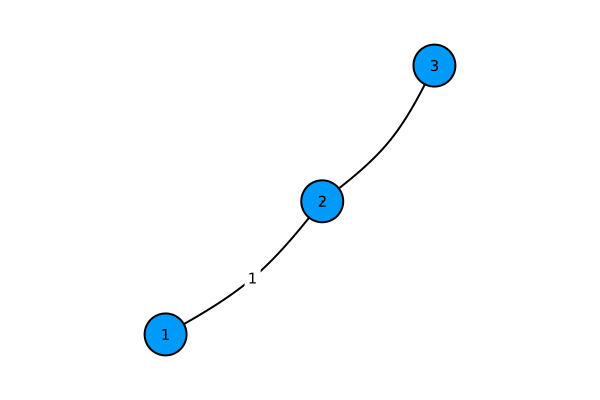

In [20]:
graphplot(g1,
# nodes
names = 1:nv(g1),
fontsize = 10,
nodeshape = :circle,
markersize = 0.15,
markerstrokewidth = 2,
# edges
edgelabel = edgelabels,
linewidth = 2
)

In [1]:
using PlotlyJS, Graphs, GraphPlot

In [2]:
g, dists = euclidean_graph(5, 2, cutoff=0.3);

In [3]:
using GraphRecipes
using Plots

In [4]:
const n = 15
const A = Float64[ rand() < 0.5 ? 0 : rand() for i=1:n, j=1:n]
for i=1:n
    A[i, 1:i-1] = A[1:i-1, i]
    A[i, i] = 0
end

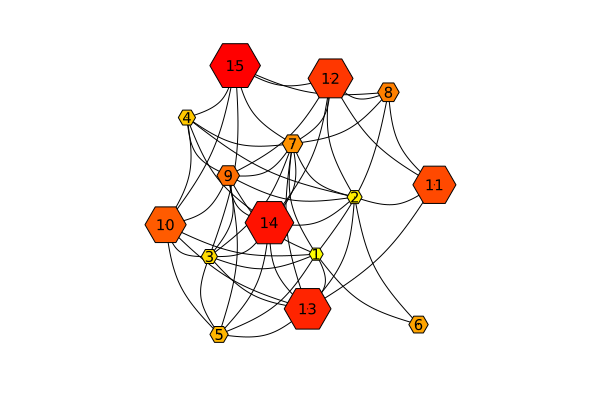

In [5]:
graphplot(A,
          markersize = 0.2,
          node_weights = 1:n,
          markercolor = range(colorant"yellow", stop=colorant"red", length=n),
          names = 1:n,
          fontsize = 10,
          linecolor = :darkgrey
          )

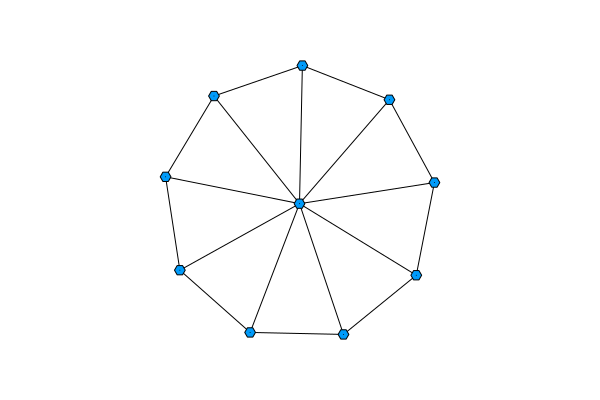

In [6]:
g = wheel_graph(10)
graphplot(g, curves=false)

In [7]:
g, dists = euclidean_graph(5, 2, cutoff=0.3);

In [8]:
graphplot(g)

MethodError: MethodError: reducing over an empty collection is not allowed; consider supplying `init` to the reducer

In [9]:
G = euclidean_graph(200, 2, cutoff=0.125)[1]

{200, 843} undirected simple Int64 graph

In [10]:
using GraphPlot

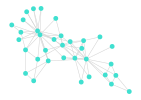

In [11]:
using Graphs: smallgraph
g = smallgraph(:karate)
gplot(g)

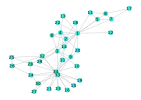

In [12]:
using Graphs
nodelabel = 1:nv(g)
gplot(g, nodelabel=nodelabel)

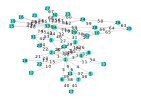

In [13]:
edgelabel = 1:Graphs.ne(g)
gplot(g, edgelabel=edgelabel, nodelabel=nodelabel)

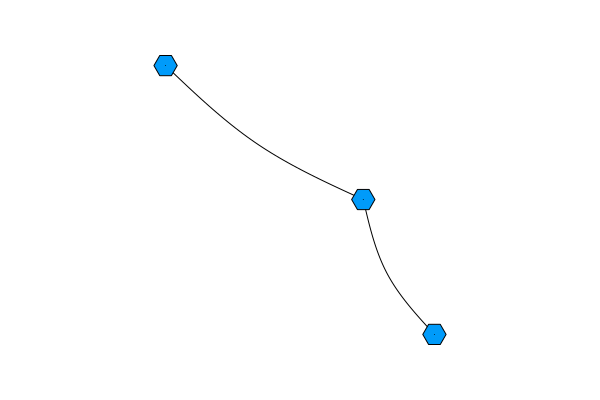

In [15]:
g1 = Graph(3, 2)
## Use GraphRecipes.jl to View Graph
graphplot(g1)


In [17]:
edgelabels = Dict(
    (1, 2) => 1,
    (1, 3) => 2
)

Dict{Tuple{Int64, Int64}, Int64} with 2 entries:
  (1, 2) => 1
  (1, 3) => 2

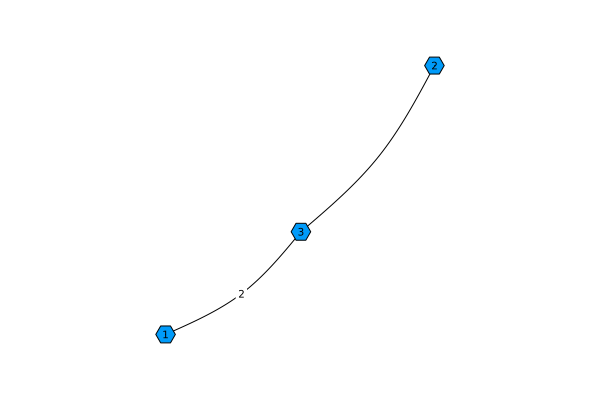

In [19]:
p1=graphplot(g1,
# nodes
names = 1:nv(g1),
# edges
edgelabel = edgelabels
)

In [20]:
vertices(g1)

Base.OneTo(3)

In [21]:
edges(g1)

SimpleEdgeIter 2

In [22]:
collect(edges(g1))

2-element Vector{Graphs.SimpleGraphs.SimpleEdge{Int64}}:
 Edge 1 => 3
 Edge 2 => 3

In [23]:
edgelabels2 = Dict(
    (1, 3) => 1,
    (2, 3) => 2
)

Dict{Tuple{Int64, Int64}, Int64} with 2 entries:
  (1, 3) => 1
  (2, 3) => 2

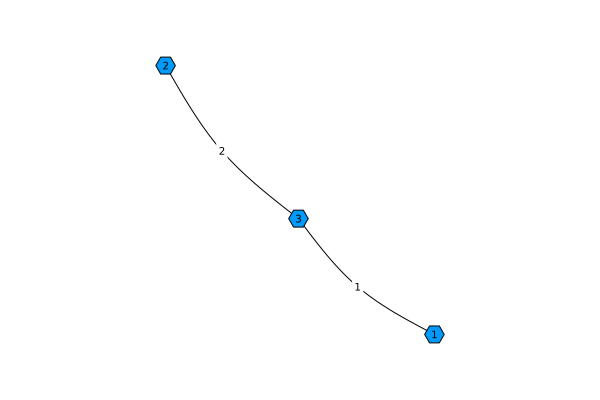

In [24]:
graphplot(g1,
# nodes
names = 1:nv(g1),
# edges
edgelabel = edgelabels2
)

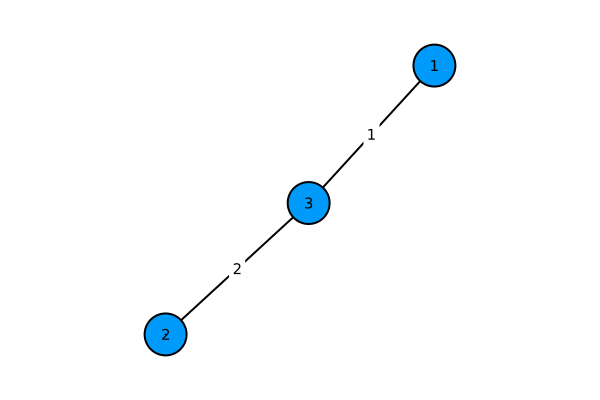

In [25]:
graphplot(g1,
# nodes
names = 1:nv(g1),
fontsize = 10,
nodeshape = :circle,
markersize = 0.15,
markerstrokewidth = 2,
# edges
edgelabel = edgelabels2,
linewidth = 2,
curves = false
)

In [26]:
pos_x, pos_y = GraphPlot.spring_layout(G)

([0.5863634610814747, -0.7676137036688889, 0.30757320614190675, -0.5856260728861409, -0.8220172600754305, 0.718248853322667, -0.5263766154050287, -0.8920712042881165, -0.9176415466716152, -0.7774823327690783  …  0.532411270415307, -0.6249516832331995, 0.6717547244727244, 0.9022522194899991, 0.10780604481600786, -0.734293812240468, 0.774023803042744, -0.8074883832796946, 0.31274452379460826, 0.6523788912790014], [0.23729895959252167, 0.9669196767138726, 0.25515788303084164, -0.4173819973690617, 0.031294430887434554, -0.6302579834577424, 0.26921174573656814, 0.3300888965007891, 0.7525576811706041, -0.69227309825008  …  -0.43377456061785413, -0.10420020808066721, -0.5445081239457334, -0.14981112077219816, -0.7199360387868768, -0.2789218221597828, -0.41257012801765547, 0.37488467692374083, 0.15640171346536413, -0.37568753171214686])

In [39]:
# Create plot points
edge_x = []
edge_y = []

Any[]

In [31]:
G2 = euclidean_graph(15, 2, cutoff=0.125)[1]

{15, 4} undirected simple Int64 graph

In [32]:
edges(G2)

SimpleEdgeIter 4

In [33]:
collect(edges(G2))

4-element Vector{Graphs.SimpleGraphs.SimpleEdge{Int64}}:
 Edge 1 => 6
 Edge 3 => 9
 Edge 4 => 5
 Edge 4 => 7

In [34]:
pos_x, pos_y = GraphPlot.spring_layout(G2)

([0.42074252626109554, -0.7989598353200099, -0.3744550748568978, 0.666907252476773, 0.6107424763663158, 0.32253128933351904, 0.7060183417601917, 1.0, -0.3205504467323408, -1.0, 0.7843910022565339, 0.20317244084742025, -0.9420192142464684, -0.5848900144048974, -0.08458159236870877], [0.83839024772506, 0.7094780420884417, -0.4060046052186028, -0.07646220405678439, 0.019540082972466122, 0.8206495306107533, -0.17777221473733074, 0.28998380930921597, -0.4871965524446785, 0.19450359654148497, -0.7508958189506294, -1.0, -0.3331727564094348, -0.8253564195942453, 1.0])

In [40]:
for edge in edges(G2)
    push!(edge_x, pos_x[src(edge)])
    push!(edge_x, pos_x[dst(edge)])
    push!(edge_y, pos_y[src(edge)])
    push!(edge_y, pos_y[dst(edge)])
end

In [41]:
edge_x

8-element Vector{Any}:
  0.42074252626109554
  0.32253128933351904
 -0.3744550748568978
 -0.3205504467323408
  0.666907252476773
  0.6107424763663158
  0.666907252476773
  0.7060183417601917

In [42]:
G = euclidean_graph(200, 2, cutoff=0.125)[1]
# Position nodes
pos_x, pos_y = GraphPlot.spring_layout(G)

# Create plot points
edge_x = []
edge_y = []

for edge in edges(G)
    push!(edge_x, pos_x[src(edge)])
    push!(edge_x, pos_x[dst(edge)])
    push!(edge_y, pos_y[src(edge)])
    push!(edge_y, pos_y[dst(edge)])
end


In [43]:
color_map = [size(neighbors(G, node))[1] for node in 1:200]

200-element Vector{Int64}:
 10
 16
 12
  6
  9
 12
  3
  5
 12
  7
  ⋮
 17
  9
 17
 15
  9
  7
 13
 16
  2

In [45]:
size(neighbors(G,1))

(10,)

In [46]:
# Create edges
edges_trace = scatter(
    mode="lines",
    x=edge_x,
    y=edge_y,
    line=attr(
        width=0.5,
        color="#888"
    )
)




UndefVarError: UndefVarError: `scatter` not defined

In [1]:
using PlotlyJS

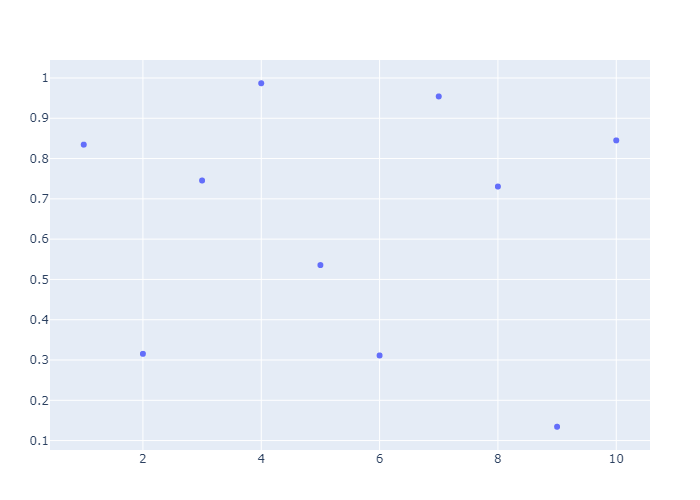

In [2]:
plot(scatter(x=1:10, y=rand(10), mode="markers"))

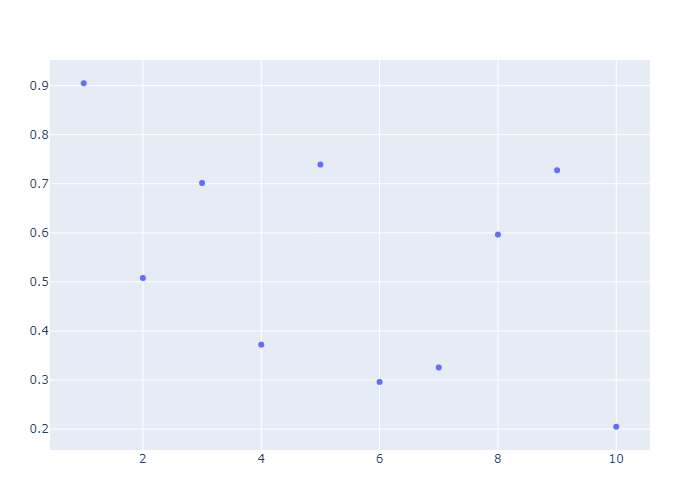

In [3]:
PlotlyJS.plot(scatter(x=1:10, y=rand(10), mode="markers"))

In [4]:
using PlotlyJS
using Graphs
#using LightGraphs
using GraphPlot  # for spring_layout

# Generate a random layout
G =  euclidean_graph(200, 2, cutoff=0.125)[1]
# Position nodes
pos_x, pos_y = GraphPlot.spring_layout(G)

# Create plot points
edge_x = []
edge_y = []

for edge in edges(G)
    push!(edge_x, pos_x[src(edge)])
    push!(edge_x, pos_x[dst(edge)])
    push!(edge_y, pos_y[src(edge)])
    push!(edge_y, pos_y[dst(edge)])
end

#  Color node points by the number of connections.
color_map = [size(neighbors(G, node))[1] for node in 1:200]

200-element Vector{Int64}:
 17
  7
  4
 19
 10
  8
  8
  6
  3
  9
  ⋮
 10
  6
  7
  6
 15
 15
 18
 10
  9

In [5]:
# Create edges
edges_trace = scatter(
    mode="lines",
    x=edge_x,
    y=edge_y,
    line=attr(
        width=0.5,
        color="#888"
    ),
)

scatter with fields line, mode, type, x, and y


In [6]:
# Create nodes
nodes_trace = scatter(
    x=pos_x,
    y=pos_y,
    mode="markers",
    text = [string("# of connections: ", connection) for connection in color_map],
    marker=attr(
        showscale=true,
        colorscale=colors.imola,
        color=color_map,
        size=10,
        colorbar=attr(
            thickness=15,
            title="Node Connections",
            xanchor="left",
            titleside="right"
      )
    )
)


scatter with fields marker, mode, text, type, x, and y


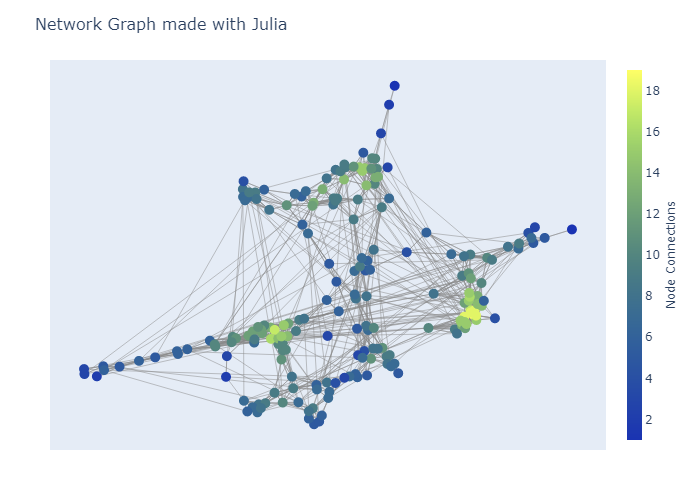

In [8]:
# Create Plot
plot(
    [edges_trace, nodes_trace],
    Layout(
        hovermode="closest",
        title="Network Graph made with Julia",
        titlefont_size=16,
        showlegend=false,
        showarrow=false,
        xaxis=attr(showgrid=false, zeroline=false, showticklabels=false),
        yaxis=attr(showgrid=false, zeroline=false, showticklabels=false)
    )
)